ADF Statistic: -7.104890882267328
p-value: 4.077786565539053e-10


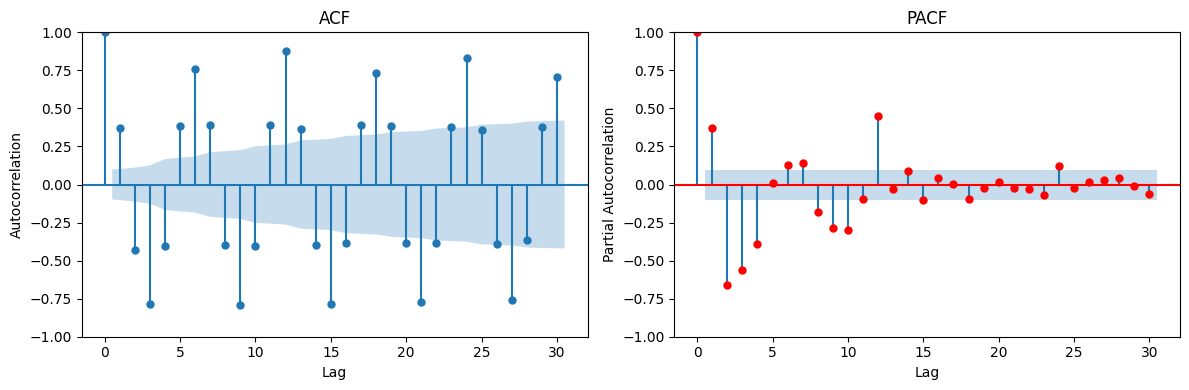

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------
# Load and preprocess data
# -----------------------------
df = pd.read_csv("ML471_S1_Datafile_Concept.csv")

df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace=True)

df.dropna(inplace=True)

# Differenced series
y = df["Consumption"].diff().dropna()

# -----------------------------
# Stationarity check (ADF)
# -----------------------------
adf_result = adfuller(y)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# -----------------------------
# ACF & PACF
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(y, lags=30, ax=axes[0])
axes[0].set_title("ACF")
axes[0].set_xlabel("Lag")
axes[0].set_ylabel("Autocorrelation")

plot_pacf(y, lags=30, ax=axes[1], method="ywm", color = 'red')
axes[1].set_title("PACF")
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Partial Autocorrelation")

plt.tight_layout()
plt.show()

